# Recursion

... is a method to solve a problem by reducing it to simpler but similar subproblems:

- Functions call themselves, reducing the computation to simpler cases ...
- ... until a *base case* is encountered that can be solved without reference to the function

A function $f$ is recursive if and only if

$f(x) = \left\{\begin{array}{ll} b(x) & \text{if $B(x)$} \\ r(f,x) & \text{otherwise} \end{array}\right.$

- function $b$ and predicate $B$ determine the base case
- $r$ is an arbitrary function

Motivation:

- write down definition instead of details of computation (common approach in mathematics)
- $\Rightarrow$ try to avoid instructions, use declarations

*Note*:

- type / type class should define the correct "space"
- all cases must reduce to base cases; otherwise, the computation may not stop
- nested evaluation may be limited by available stack space

 
## Example: Factorial

$n! = \left\{\begin{array}{ll} 1 & n = 0 \\ n \cdot (n-1)! & n > 0\end{array}\right.$  
  
Base case: 0 factorial is 1

No type for natural numbers (no "correct space"). Remedies:

- Handle negative arguments as errors (exhaustive pattern)

In [2]:
facE :: (Integral a) => a -> a
facE i
    | i < 0  = error "Negative Faculty not defined"
    | i == 0 = 1
    | otherwise = i * facE (i-1)

- non-exhaustive pattern

In [3]:
facNE :: (Integral a) => a -> a
facNE 0 = 1
facNE i | i > 0 = i* facNE (i-1)

In [4]:
facE (-1)

Negative Faculty not defined

In [5]:
facNE (-1)

<interactive>:(2,1)-(3,32): Non-exhaustive patterns in function facNE

## Example: greatest common divisor

**Algorithm (Euclid)**:

- Iterative form

    *Repeat*, until $a = b$
 
    - If $a > b$, *set* $a = a−b$
    - If $a < b$, *set* $b = b−a$
    
- Recursive form

    The gcd of $a$ and $b$ *is*
    
    - $a$ if $a = b$
    - *the gcd* of $a-b$ and $b$ if $a > b$
    - *the gcd* of $a$ and $b-a$ if $a < b$

The following implementation additionally handles negative numbers.

In [6]:
gcd :: (Integral a) => a -> a -> a
gcd a b | a == b = a
        | a > b  = gcd (x-y) y
        | a < b  = gcd (y-x) x
        where x = abs a
              y = abs b

In [7]:
gcd 21 30

3


## Example: maximum

For a list $L$, find the maximum of all elements: $\max (L_i,...,L_n)$

Base case: list with one element, undefined for empty lists

In [8]:
maximum :: (Ord a) => [a] -> a
maximum [] = error "maximum of empty list"
maximum [x] = x
maximum (x:xs) = max x (maximum xs)

In [9]:
maximum [1, 21, 5]

21

## Example: the sieve of Eratosthenes

Algorithm for computing prime numbers

In [2]:
sieve :: Integral a => [a] -> [a]
sieve [] = []
sieve (x:xs) = x : sieve [ y | y <- xs, y `mod` x /= 0 ]

In [3]:
sieve [2..20]

[2,3,5,7,11,13,17,19]

## Thinking recursively

- identify recurring patterns
- data structures can often be treated/computed recursively (e.g. numbers, lists, trees)
- base cases are often similar:
    - numbers: identity (0 or 1)
    - lists: empty or singleton list
    - trees: the root
    - ...

## Recursion we've already met
... but not recognized as such.

### map
remember: 'map' maps a function over all elements of a list

In [1]:
map :: (a -> b) -> [a] -> [b]
map _ [] = []
map f (x:xs) = f x : map f xs

### filter
takes only elements of a list that fulfill a predicate 'p'

In [2]:
filter :: (a -> Bool) -> [a] -> [a]
filter _ [] = []
filter p (x:xs) 
    | p x       = x : filter p xs
    | otherwise = filter p xs

### takeWhile
takes list elements until the predicate is fulfilled the first time

In [4]:
takeWhile :: (a -> Bool) -> [a] -> [a]
takeWhile _ [] =  []
takeWhile p (x:xs)
    | p x       =  x : takeWhile p xs
    | otherwise =  []

### zipWith
combine two lists via a function acting on one element each

In [1]:
zipWith :: (a -> b -> c) -> [a] -> [b] -> [c]
zipWith f (a:as) (b:bs) = f a b : zipWith f as bs
zipWith _ _      _      = []

## Example: Sierpinski triangle

1. start from a triangle 
2. remove the triangle which is defined through the middlepoints of the edges.
3. go to 1. (recursion)


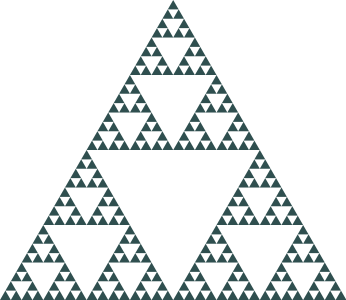

In [1]:
:ext NoMonomorphismRestriction
:ext FlexibleContexts
:ext TypeFamilies
import Diagrams.Prelude
import Diagrams.Backend.Cairo 


sierpinski 1 = triangle 1
sierpinski n =     s
                  ===
               (s ||| s) # centerX
    where s = sierpinski (n-1)

example :: Diagram B
example = sierpinski 6 #  centerXY # lw 0 # fc darkslategray 

diagram example

Further documentation: [diagrams](http://projects.haskell.org/diagrams/)
<img src="sierpinski.svg"></img>